In [62]:
import pandas as pd 
import json
DATASET_NAME = "heart_with_medical_report_717.csv"
df1 = pd.read_csv(DATASET_NAME)

def transform_keys(json_data):
    if not isinstance(json_data, dict):
        return json_data
    # Define the key mapping
    key_map = {
        'age': 'Age',
        'sex': 'Sex',
        'chest_pain_type': 'ChestPainType',
        'resting_bp': 'RestingBP',
        'cholesterol': 'Cholesterol',
        'fasting_bs': 'FastingBS',
        'resting_ecg': 'RestingECG',
        'max_hr': 'MaxHR',
        'exercise_angina': 'ExerciseAngina',
        'oldpeak': 'Oldpeak',
        'st_slope': 'ST_Slope'
    }
    # Transform the keys using the key mapping
    transformed_data = {key_map.get(k, k): v for k, v in json_data.items()}
    return transformed_data

In [63]:
string_to_check = "WBC 7.2, hemoglobin 14.8, platelets 200. Chemistry-7 within normal limits. Lipid profile: Triglycerides 120, total cholesterol 289, HDL 50, LDL 200."
df1[df1["medical_report"].str.contains(string_to_check, na=False)]["result"]

Series([], Name: result, dtype: object)

In [64]:
df1.sample(3).medical_report.iloc[0]

'"REASON FOR CONSULTATION: Chest pain evaluation.\nHISTORY OF PRESENT ILLNESS: The patient is a 41-year-old female who presents with non-anginal chest pain that occurs at rest and is not relieved by nitroglycerin. The patient has no significant past medical history.\nPAST MEDICAL HISTORY: None.\nALLERGIES: No known drug allergies.\nFAMILY HISTORY: No significant family history of heart disease.\nSOCIAL HISTORY: Non-smoker, occasional alcohol consumption, and no illicit drug use.\nCURRENT MEDICATIONS: None.\nREVIEW OF SYSTEMS: No shortness of breath, palpitations, or syncope.\nPHYSICAL EXAMINATION:\nVITAL SIGNS: Blood pressure 112/70, pulse 80, O2 saturation 98% on room air, temperature 98.6, respiratory rate 16.\nGENERAL: Patient is alert and oriented, appears comfortable at rest.\nHEAD AND NECK: No JVP seen, no carotid bruits.\nCHEST: Clear to auscultation bilaterally.\nCARDIOVASCULAR: Regular rhythm, normal S1 and S2, no murmurs, rubs, or gallops.\nABDOMEN: Soft, non-tender, and non-

In [65]:
df = pd.read_csv("data/medical_report.csv")

In [66]:
df1.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,total_tokens,completion_tokens,total_cost,time_taken,json_row,result,result_total_tokens,result_completion_tokens,result_cost,result_taken
0,47,M,TA,110,249,0,Normal,150,N,0.0,...,1990.0,488.0,0.00398,27.91307,"{""age"": 47, ""sex"": ""M"", ""chest_pain_type"": ""TA...",The patient's age is mentioned in the report a...,2615.0,418.0,0.00523,13.432939


In [67]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'medical_report', 'total_tokens', 'completion_tokens',
       'total_cost', 'time_taken', 'json_row', 'result', 'result_total_tokens',
       'result_completion_tokens', 'result_cost', 'result_taken'],
      dtype='object')

In [68]:
df1.iloc[0]['result']

'The patient\'s age is mentioned in the report as 47, therefore "Age": 47.\nThe patient is described as a male in the report, therefore "Sex": "M".\nThe report describes the patient\'s chest pain as typical angina, therefore "ChestPainType": "TA".\nThe patient\'s blood pressure is mentioned in the "VITAL SIGNS" section as 110/70, therefore "RestingBP": 110.\nThe report mentions the patient\'s total cholesterol value under "LABORATORY DATA": "total cholesterol 249", therefore "Cholesterol": 249.\nThe fasting blood sugar is mentioned in the "LABORATORY DATA" section as 90 mg/dL, which is less than 120 mg/dL, so the value is 0, therefore "FastingBS": 0.\nThe 12-lead EKG results in the report revealed normal sinus rhythm, therefore "RestingECG": "Normal".\nThe maximum heart rate achieved during the treadmill stress test is mentioned as 150 beats per minute, therefore "MaxHR": 150.\nThe report states that the patient did not experience chest pain or shortness of breath during the treadmill 

In [69]:
from pydantic import BaseModel, Field, validator
from typing import Optional, Union

class PatientData(BaseModel):
    age: Optional[int] = Field(description="Age of the patient [int](years)")
    sex: Optional[str] = Field(description="Sex of the patient [M,F] where M: Male, F: Female")
    chest_pain_type: Optional[str] = Field(description="Chest pain type [ATA, NAP, ASY, TA] where TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic")
    resting_bp: Optional[int] = Field(description="Resting blood pressure [int](mm Hg)")
    cholesterol: Optional[int] = Field(description="Serum cholesterol [int[(mm/dl)")
    fasting_bs: Optional[int] = Field(description="Fasting blood sugar [1,0] where 1: if FastingBS > 120 mg/dl, 0: otherwise")
    resting_ecg: Optional[str] = Field(description="Resting electrocardiogram results [Normal, ST, LVH] where Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria")
    max_hr: Optional[int] = Field(description="Maximum heart rate achieved [Numeric value between 60 and 202]")
    exercise_angina: Optional[str] = Field(description="Exercise-induced angina [Y,N] where Y: Yes, N: No")
    oldpeak: Optional[Union[float,int]] = Field(description="Oldpeak = ST Numeric value measured in depression")
    st_slope: Optional[str] = Field(description="The slope of the peak exercise ST segment [Up, Flat, Down] where Up: upsloping, Flat: flat, Down: downsloping")

    @validator("sex")
    def validate_sex(cls, v):
        if v is None or v == "" or v == " ":
            return None
        if v not in ("M", "F"):
            raise ValueError("Invalid value for Sex, allowed values are 'M' and 'F'")
        return v

    @validator("chest_pain_type")
    def validate_chest_pain_type(cls, v):
        if v is None or v == "" or v == " ":
            return None
        allowed_values = ("ATA", "NAP", "ASY", "TA")
        if v not in allowed_values:
            raise ValueError(f"Invalid value for ChestPainType, allowed values are {allowed_values}")
        return v

    @validator("resting_ecg")
    def validate_resting_ecg(cls, v):
        if v is None or v == "" or v == " ":
            return None
        allowed_values = ("Normal", "ST", "LVH")
        if v not in allowed_values:
            raise ValueError(f"Invalid value for RestingECG, allowed values are {allowed_values}")
        return v

    @validator("exercise_angina")
    def validate_exercise_angina(cls, v):
        if v is None or v == "" or v == " ":
            return None
        if v not in ("N", "Y"):
            raise ValueError("Invalid value for ExerciseAngina, allowed values are 'N' and 'Y'")
        return v

    @validator("st_slope")
    def validate_st_slope(cls, v):
        if v is None or v == "" or v == " ":
            return None
        allowed_values = ("Up", "Flat", "Down")
        if v not in allowed_values:
            raise ValueError(f"Invalid value for ST_Slope, allowed values are {allowed_values}")
        return v
    
object_ = PatientData()

In [70]:
import json
import re
import pandas as pd
from typing import Any
from pydantic import BaseModel, ValidationError

PYDANTIC_FORMAT_INSTRUCTIONS = """The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {{"properties": {{"foo": {{"title": "Foo", "description": "a list of strings", "type": "array", "items": {{"type": "string"}}}}}}, "required": ["foo"]}}}}
the object {{"foo": ["bar", "baz"]}} is a well-formatted instance of the schema. The object {{"properties": {{"foo": ["bar", "baz"]}}}} is not well-formatted.

Here is the output schema:
```
{schema}
```"""

class VORC(object):
    pydantic_object: Any
    def __init__(self, pydantic_object):
        self.pydantic_object = pydantic_object
    
    def fix_quotes(self, json_str: str):
        return json_str.replace("'", '"')#.replace("r'\bnull'", "None").replace("Null", "None")
        
    def parse(self, text: str):
        try:
            # Greedy search for 1st json candidate.
            match = re.search(
                "\{.*\}", text.strip(), re.MULTILINE | re.IGNORECASE | re.DOTALL
            )
            json_str = ""
            if match:
                json_str = self.fix_quotes(match.group())
            json_object = json.loads(json_str)
            self.pydantic_object.parse_obj(json_object)
            return json_object, "Valid"
        except json.JSONDecodeError as e:
            name = self.pydantic_object.__name__
            msg = f"Failed to parse {name} from completion {text}. Got: {e}"
            print(msg)
            raise e
        except ValidationError as e:
            name = self.pydantic_object.__name__
            msg = f"Failed to parse {name} from completion {text}. Got: {e}"
            raise e
                    
    def process_dataframe(self, df: pd.DataFrame):
        df["result_json"], df["result_json_description"] = zip(*df["result"].apply(self.parse))
        return df
    
    def parse_text(self, text: str):
        # Greedy search for 1st json candidate.
        match = re.search(
            "\{.*\}", text.strip(), re.MULTILINE | re.IGNORECASE | re.DOTALL
        )
        json_str = ""
        if match:
            json_str = self.fix_quotes(match.group())
        json_object = json.loads(json_str)
        return json_object

    def get_format_instructions(self) -> str:
        schema = self.pydantic_object.schema()

        # Remove extraneous fields.
        reduced_schema = schema
        if "title" in reduced_schema:
            del reduced_schema["title"]
        if "type" in reduced_schema:
            del reduced_schema["type"]
        # Ensure json in context is well-formed with double quotes.
        schema_str = json.dumps(reduced_schema)

        return PYDANTIC_FORMAT_INSTRUCTIONS.format(schema=schema_str)
    
    
extractor = VORC(PatientData)
df2 = extractor.process_dataframe(df1)
df2.loc[:, "json_row"] = df2.json_row.apply(lambda x: extractor.parse_text(x)) 
df1['json_row'] = df1['json_row'].apply(lambda x: transform_keys(x))
df1['result_json'] = df1['result_json'].apply(lambda x: transform_keys(x))

In [71]:
df1.result_json_description.value_counts()

JSONDecodeError    565
Valid              153
Name: result_json_description, dtype: int64

In [34]:
def count_none_values(json_obj):
    """Count the number of None values in the JSON object"""
    return sum(1 for value in json_obj.values() if value is None)

def count_value_in_medical_report(value, medical_report):
    """Count the number of occurrences of a specific value in the medical_report"""
    return 1 if str(value) in medical_report else 0

def compare_dicts(dict1, dict2, medical_report):
    comparison_result = {}
    none_count = 0
    medical_report_count = 0
    if type(dict2) != dict:
        return {key: False for key in dict1.keys()}, none_count, medical_report_count
    for key in dict1.keys():
        if dict1.get(key) == dict2.get(key):
            comparison_result[key] = True
        else:
            if dict2.get(key) is None:
                none_count += 1
                medical_report_count += count_value_in_medical_report(dict1.get(key), medical_report)
                comparison_result[key] = True if str(dict1.get(key)) not in medical_report else False
            if str(dict1.get(key)) not in medical_report and str(dict2.get(key)) in medical_report:
                comparison_result[key] = True                 
            else:
                comparison_result[key] = False
    return comparison_result, none_count, medical_report_count

def create_comparison_columns(df: pd.DataFrame):
    comparisons = []
    none_counts = []
    medical_report_counts = []

    for _, row in df.iterrows():
        comparison, none_count, medical_report_count = compare_dicts(
            row["json_row"], row["result_json"], row["medical_report"]
        )
        comparisons.append(comparison)
        none_counts.append(none_count)
        medical_report_counts.append(medical_report_count)

    df["validation_result"] = [all(comp.values()) for comp in comparisons]
    
    for key in df.iloc[0]["json_row"].keys():
        df[f"{key}_match"] = [comparison[key] for comparison in comparisons]

    df["none_count"] = none_counts
    df["false_none"] = medical_report_counts

    return df
    

df2 = create_comparison_columns(df2)

def get_statistics(df: pd.DataFrame, dataset_name):
    total_rows = len(df)
    valid_rows = len(df[df["validation_result"] == True])
    invalid_rows = len(df[df["validation_result"] == False])
    none_rows = df["none_count"].sum()
    false_none_rows = df["false_none"].sum()
    cost_mean = df["result_cost"].mean()
    cost_mean_gpt4 = df["result_completion_tokens"].mean()*0.045/1000
    
    data = {
        "Total Rows": [total_rows],
        "Valid Rows": [valid_rows],
        "Invalid Rows": [invalid_rows],
        "None Rows": [none_rows],
        "False None Rows": [false_none_rows],
        "Cost Per Extraction (ChatGPT)": [cost_mean],
        "Cost Per Extraction (GPT4)": [cost_mean_gpt4],
    }

    stats_df = pd.DataFrame(data)
    ds_name = dataset_name.split(".")[0]
    stats_df.to_csv(f"results/extraction/{ds_name}_extraction_stats.csv")
    return stats_df

stats_df = get_statistics(df2, DATASET_NAME)

stats_df.head()

,Total Rows,Valid Rows,Invalid Rows,None Rows,False None Rows,Cost Per Extraction (ChatGPT),Cost Per Extraction (GPT4)
0,718,706,12,0,0,0.005247,0.019201


In [35]:
df2[df2["validation_result"] == False]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,RestingBP_match,Cholesterol_match,FastingBS_match,RestingECG_match,MaxHR_match,ExerciseAngina_match,Oldpeak_match,ST_Slope_match,none_count,false_none
4,56,M,ATA,130,184,0,Normal,100,N,0.0,...,True,True,True,True,True,True,True,True,0,0
188,55,M,ASY,140,0,0,Normal,83,N,0.0,...,True,True,True,True,False,True,True,True,0,0
207,62,M,ASY,115,0,1,Normal,72,Y,-0.5,...,True,True,True,True,False,True,True,True,0,0
239,74,M,NAP,138,0,0,Normal,116,N,0.2,...,True,False,True,True,True,True,True,True,0,0
249,55,M,NAP,0,0,0,Normal,155,N,1.5,...,False,True,True,True,True,True,True,True,0,0
307,40,M,NAP,106,240,0,Normal,80,Y,0.0,...,True,True,True,True,False,True,True,True,0,0
487,70,M,ATA,156,245,0,LVH,143,N,0.0,...,False,False,False,False,False,False,False,False,0,0
529,42,M,ATA,120,295,0,Normal,162,N,0.0,...,True,True,True,True,True,True,True,True,0,0
537,57,M,ASY,152,274,0,Normal,88,Y,1.2,...,True,True,True,True,False,True,True,True,0,0
586,69,M,NAP,140,254,0,LVH,146,N,2.0,...,False,False,False,False,False,False,False,False,0,0


In [36]:
df2[df2.validation_result == False]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,RestingBP_match,Cholesterol_match,FastingBS_match,RestingECG_match,MaxHR_match,ExerciseAngina_match,Oldpeak_match,ST_Slope_match,none_count,false_none
4,56,M,ATA,130,184,0,Normal,100,N,0.0,...,True,True,True,True,True,True,True,True,0,0
188,55,M,ASY,140,0,0,Normal,83,N,0.0,...,True,True,True,True,False,True,True,True,0,0
207,62,M,ASY,115,0,1,Normal,72,Y,-0.5,...,True,True,True,True,False,True,True,True,0,0
239,74,M,NAP,138,0,0,Normal,116,N,0.2,...,True,False,True,True,True,True,True,True,0,0
249,55,M,NAP,0,0,0,Normal,155,N,1.5,...,False,True,True,True,True,True,True,True,0,0
307,40,M,NAP,106,240,0,Normal,80,Y,0.0,...,True,True,True,True,False,True,True,True,0,0
487,70,M,ATA,156,245,0,LVH,143,N,0.0,...,False,False,False,False,False,False,False,False,0,0
529,42,M,ATA,120,295,0,Normal,162,N,0.0,...,True,True,True,True,True,True,True,True,0,0
537,57,M,ASY,152,274,0,Normal,88,Y,1.2,...,True,True,True,True,False,True,True,True,0,0
586,69,M,NAP,140,254,0,LVH,146,N,2.0,...,False,False,False,False,False,False,False,False,0,0


In [37]:
df2[df2.validation_result == False].loc[607].json_row

{'Age': 54,
 'Sex': 'M',
 'ChestPainType': 'ATA',
 'RestingBP': 108,
 'Cholesterol': 309,
 'FastingBS': 0,
 'RestingECG': 'Normal',
 'MaxHR': 156,
 'ExerciseAngina': 'N',
 'Oldpeak': 0.0,
 'ST_Slope': 'Up'}

In [14]:
print(df2[df2.validation_result == False].loc[607].result)

The report states that the patient is a 54-year-old male, therefore "Age": 54 and "Sex": "M".
The patient reports no chest pain or shortness of breath, therefore "ChestPainType": "NAP" (Non-Anginal Pain).
The patient's blood pressure is mentioned in the "VITAL SIGNS" section as 108/70, therefore "RestingBP": 108.
The report mentions the patient's total cholesterol value under "LABORATORY DATA": "total cholesterol 309", therefore "Cholesterol": 309.
The fasting blood sugar is mentioned in the "LABORATORY DATA" section as 90 mg/dL, which is less than 120 mg/dL, so the value is 0, therefore "FastingBS": 0.
The 12-lead EKG results in the report revealed normal sinus rhythm, therefore "RestingECG": "Normal".
The maximum heart rate achieved during the treadmill stress test is mentioned as 156 beats per minute, therefore "MaxHR": 156.
The report states that the patient did not experience chest pain or shortness of breath during the treadmill stress test, so the value is "N" for No, therefore 

In [15]:
print(df2[df2.validation_result == False].loc[607].medical_report)

"REASON FOR CONSULTATION: Routine check-up.
HISTORY OF PRESENT ILLNESS: The patient is a 54-year-old male who presents for a routine check-up. He reports no chest pain, shortness of breath, or other symptoms.
PAST MEDICAL HISTORY: No significant past medical history.
ALLERGIES: No known drug allergies.
FAMILY HISTORY: No significant family history of heart disease.
SOCIAL HISTORY: Non-smoker, occasional alcohol consumption, and no illicit drug use.
CURRENT MEDICATIONS: None.
REVIEW OF SYSTEMS: Patient reports occasional headaches.
PHYSICAL EXAMINATION:
VITAL SIGNS: Blood pressure 108/70, pulse 80, O2 saturation 98% on room air, temperature 98.6, respiratory rate 16.
GENERAL: Patient is alert and oriented, appears comfortable at rest.
HEAD AND NECK: No JVP seen, no carotid bruits.
CHEST: Clear to auscultation bilaterally.
CARDIOVASCULAR: Regular rhythm, normal S1 and S2, no murmurs, rubs, or gallops.
ABDOMEN: Soft, non-tender, and non-distended.
EXTREMITIES: No edema or clubbing.
DATA: 

# MODEL TRAINING

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# a. Data Preprocessing
json_column = 'result_json' # "result_json" # 'json_row'
# i. Convert the "json_row" column into separate feature columns in the DataFrame
df1 = df1[(df1[json_column]!="")&(df1["result_json_description"]!= "JSONDecodeError")&(df1["HeartDisease"].notnull())]
df1[json_column] = df1.apply(lambda row: row[json_column] if row["validation_result"] == False else row["json_row"], axis=1)
df_json = pd.json_normalize(df1[json_column])
if "HeartDisease" in df_json.columns:
    df_json.drop('HeartDisease', axis=1, inplace=True)
df = pd.concat([df1[["HeartDisease"]].reset_index(drop=True), df_json.reset_index(drop=True)], axis=1)
df.dropna(subset=["HeartDisease"], inplace=True)
# df = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']]

In [47]:
# ii. Perform any necessary feature scaling or normalization
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)])

# iii. Split the dataset into training and testing sets
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train = df.drop('HeartDisease', axis=1)
y_train = df['HeartDisease']

In [48]:
df_test = pd.read_csv("checkpoint_{index}.csv")[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease']].iloc[:200]
X_test = df.drop('HeartDisease', axis=1)
y_test = df['HeartDisease']

In [49]:
import pandas as pd
def test_if_data_leakage(df_test, df):
    merged_df = df_test.merge(df, how='outer', on=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'], indicator=True)
    # Check if any row has a '_merge' value of 'both'
    is_subset = (merged_df['_merge'] == 'both').any()
    # If is_subset is True, df_test has at least one row that is also in df (is a subset)
    if is_subset:
        print("df1 is a subset of original dataframe therefore data leakage is happening")
    else:
        print("df1 is not a subset of dataframe therefore no data leakage")

# test_if_data_leakage(df_test, df)

In [50]:
# b. Model Selection
# i. Choose multiple candidate models
models = [
    ('logreg', LogisticRegression()),
    ('dtree', DecisionTreeClassifier()),
    ('xgboost', XGBClassifier())
]

# ii. Perform hyperparameter tuning
param_grids = [
    {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'dtree__max_depth': [3, 5, 10, 15, 20], 'dtree__min_samples_split': [2, 3, 5, 7, 10]},
    {'xgboost__n_estimators': [50, 100, 200], 'xgboost__learning_rate': [0.01, 0.1, 0.3]}
]

best_models = []

for model, param_grid in zip(models, param_grids):
    model_name, model_instance = model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), model])
    
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append((model_name, grid_search.best_estimator_))

# iii. Select the best model
best_model = max(best_models, key=lambda x: x[1].score(X_test, y_test))[1]

# c. Model Evaluation
# i. Evaluate the chosen model on the test set
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9874301675977654
F1 Score: 0.9896670493685419
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       282
           1       0.99      0.99      0.99       434

    accuracy                           0.99       716
   macro avg       0.99      0.99      0.99       716
weighted avg       0.99      0.99      0.99       716



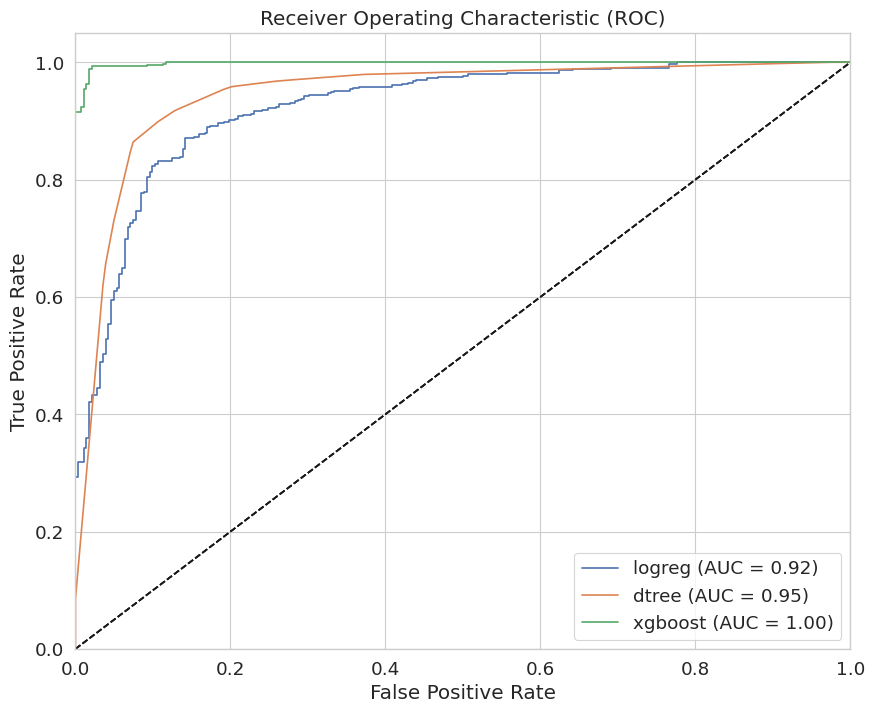

      Model     Metric     Score
0    logreg   Accuracy  0.860335
1     dtree   Accuracy  0.899441
2   xgboost   Accuracy  0.987430
3    logreg  Precision  0.869469
4     dtree  Precision  0.917051
5   xgboost  Precision  0.986270
6    logreg     Recall  0.905530
7     dtree     Recall  0.917051
8   xgboost     Recall  0.993088
9    logreg   F1 Score  0.887133
10    dtree   F1 Score  0.917051
11  xgboost   F1 Score  0.989667
12   logreg        AUC  0.924225
13    dtree        AUC  0.945877
14  xgboost        AUC  0.998194


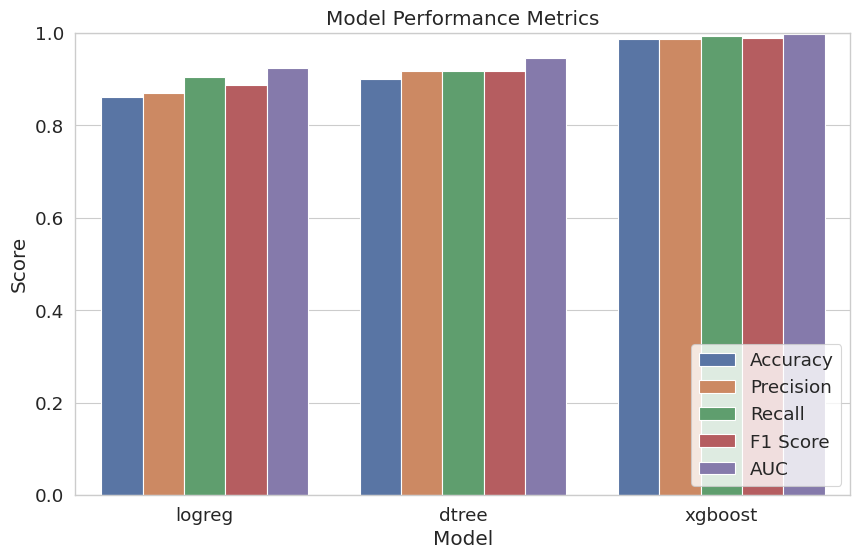

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score

# Set seaborn theme and style for high-quality plots
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label, dataset_name, model_name):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    ds_name = dataset_name.split(".")[0]
    plt.savefig("graphs/{}_AUC_results_ML.png".format(ds_name), dpi=300, bbox_inches='tight')
    # save auc data for plotting
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, dataset_name: dataset_name})
    df.to_csv("results/AUC_PLOT/{}_AUC_PLOT_DATA_{}.csv".format(ds_name, model_name), index=False)

# Function to plot precision, recall, and F1 score
def plot_scores(model_names, scores, dataset_name):
    df_scores = pd.DataFrame(scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    ds_name = dataset_name.split(".")[0]
    df_scores.to_csv("results/{}_classification_results_ML.csv".format(ds_name), index=False)
    df_scores_melt = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')
    sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores_melt)
    plt.ylim([0.0, 1.0])
    plt.title('Model Performance Metrics')
    plt.legend(loc="lower right")
    print(df_scores_melt)
    # save plot
    plt.savefig("graphs/{}_classification_results_ML.png".format(ds_name), dpi=300, bbox_inches='tight')
    

# Initialize lists for model names and scores
model_names = []
model_scores = []

# Initialize ROC plot
plt.figure(figsize=(10, 8))

# Evaluate each model and plot ROC curve
for model_name, model_instance in best_models:
    model_names.append(model_name)
    
    y_pred = model_instance.predict(X_test)
    y_score = model_instance.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    
    model_scores.append((model_name, accuracy, precision, recall, f1, roc_auc))
    
    plot_roc_curve(fpr, tpr, roc_auc, model_name, dataset_name=DATASET_NAME, model_name=model_name)

# Show ROC plot
plt.show()

# Plot precision, recall, and F1 score
plt.figure(figsize=(10, 6))
plot_scores(model_names, model_scores, dataset_name=DATASET_NAME)

# Show score plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def plot_multiple_auc(dataset_name):
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')

    csv_files = glob.glob(f'{dataset_name}*.csv')
    for file in csv_files:
        df = pd.read_csv(file)
        label = df['label'][0]
        fpr = df['fpr']
        tpr = df['tpr']
        roc_auc = df['roc_auc'][0]
        
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.legend(loc="lower right")
    ds_name = dataset_name.split(".")[0]
    plt.savefig(f"graphs/{ds_name}_combined_AUC_results_ML.png", dpi=300, bbox_inches='tight')
    plt.show()



## Feature Importance


In [ ]:
!pip install --upgrade shap


`use_label_encoder` is deprecated in 1.7.0.


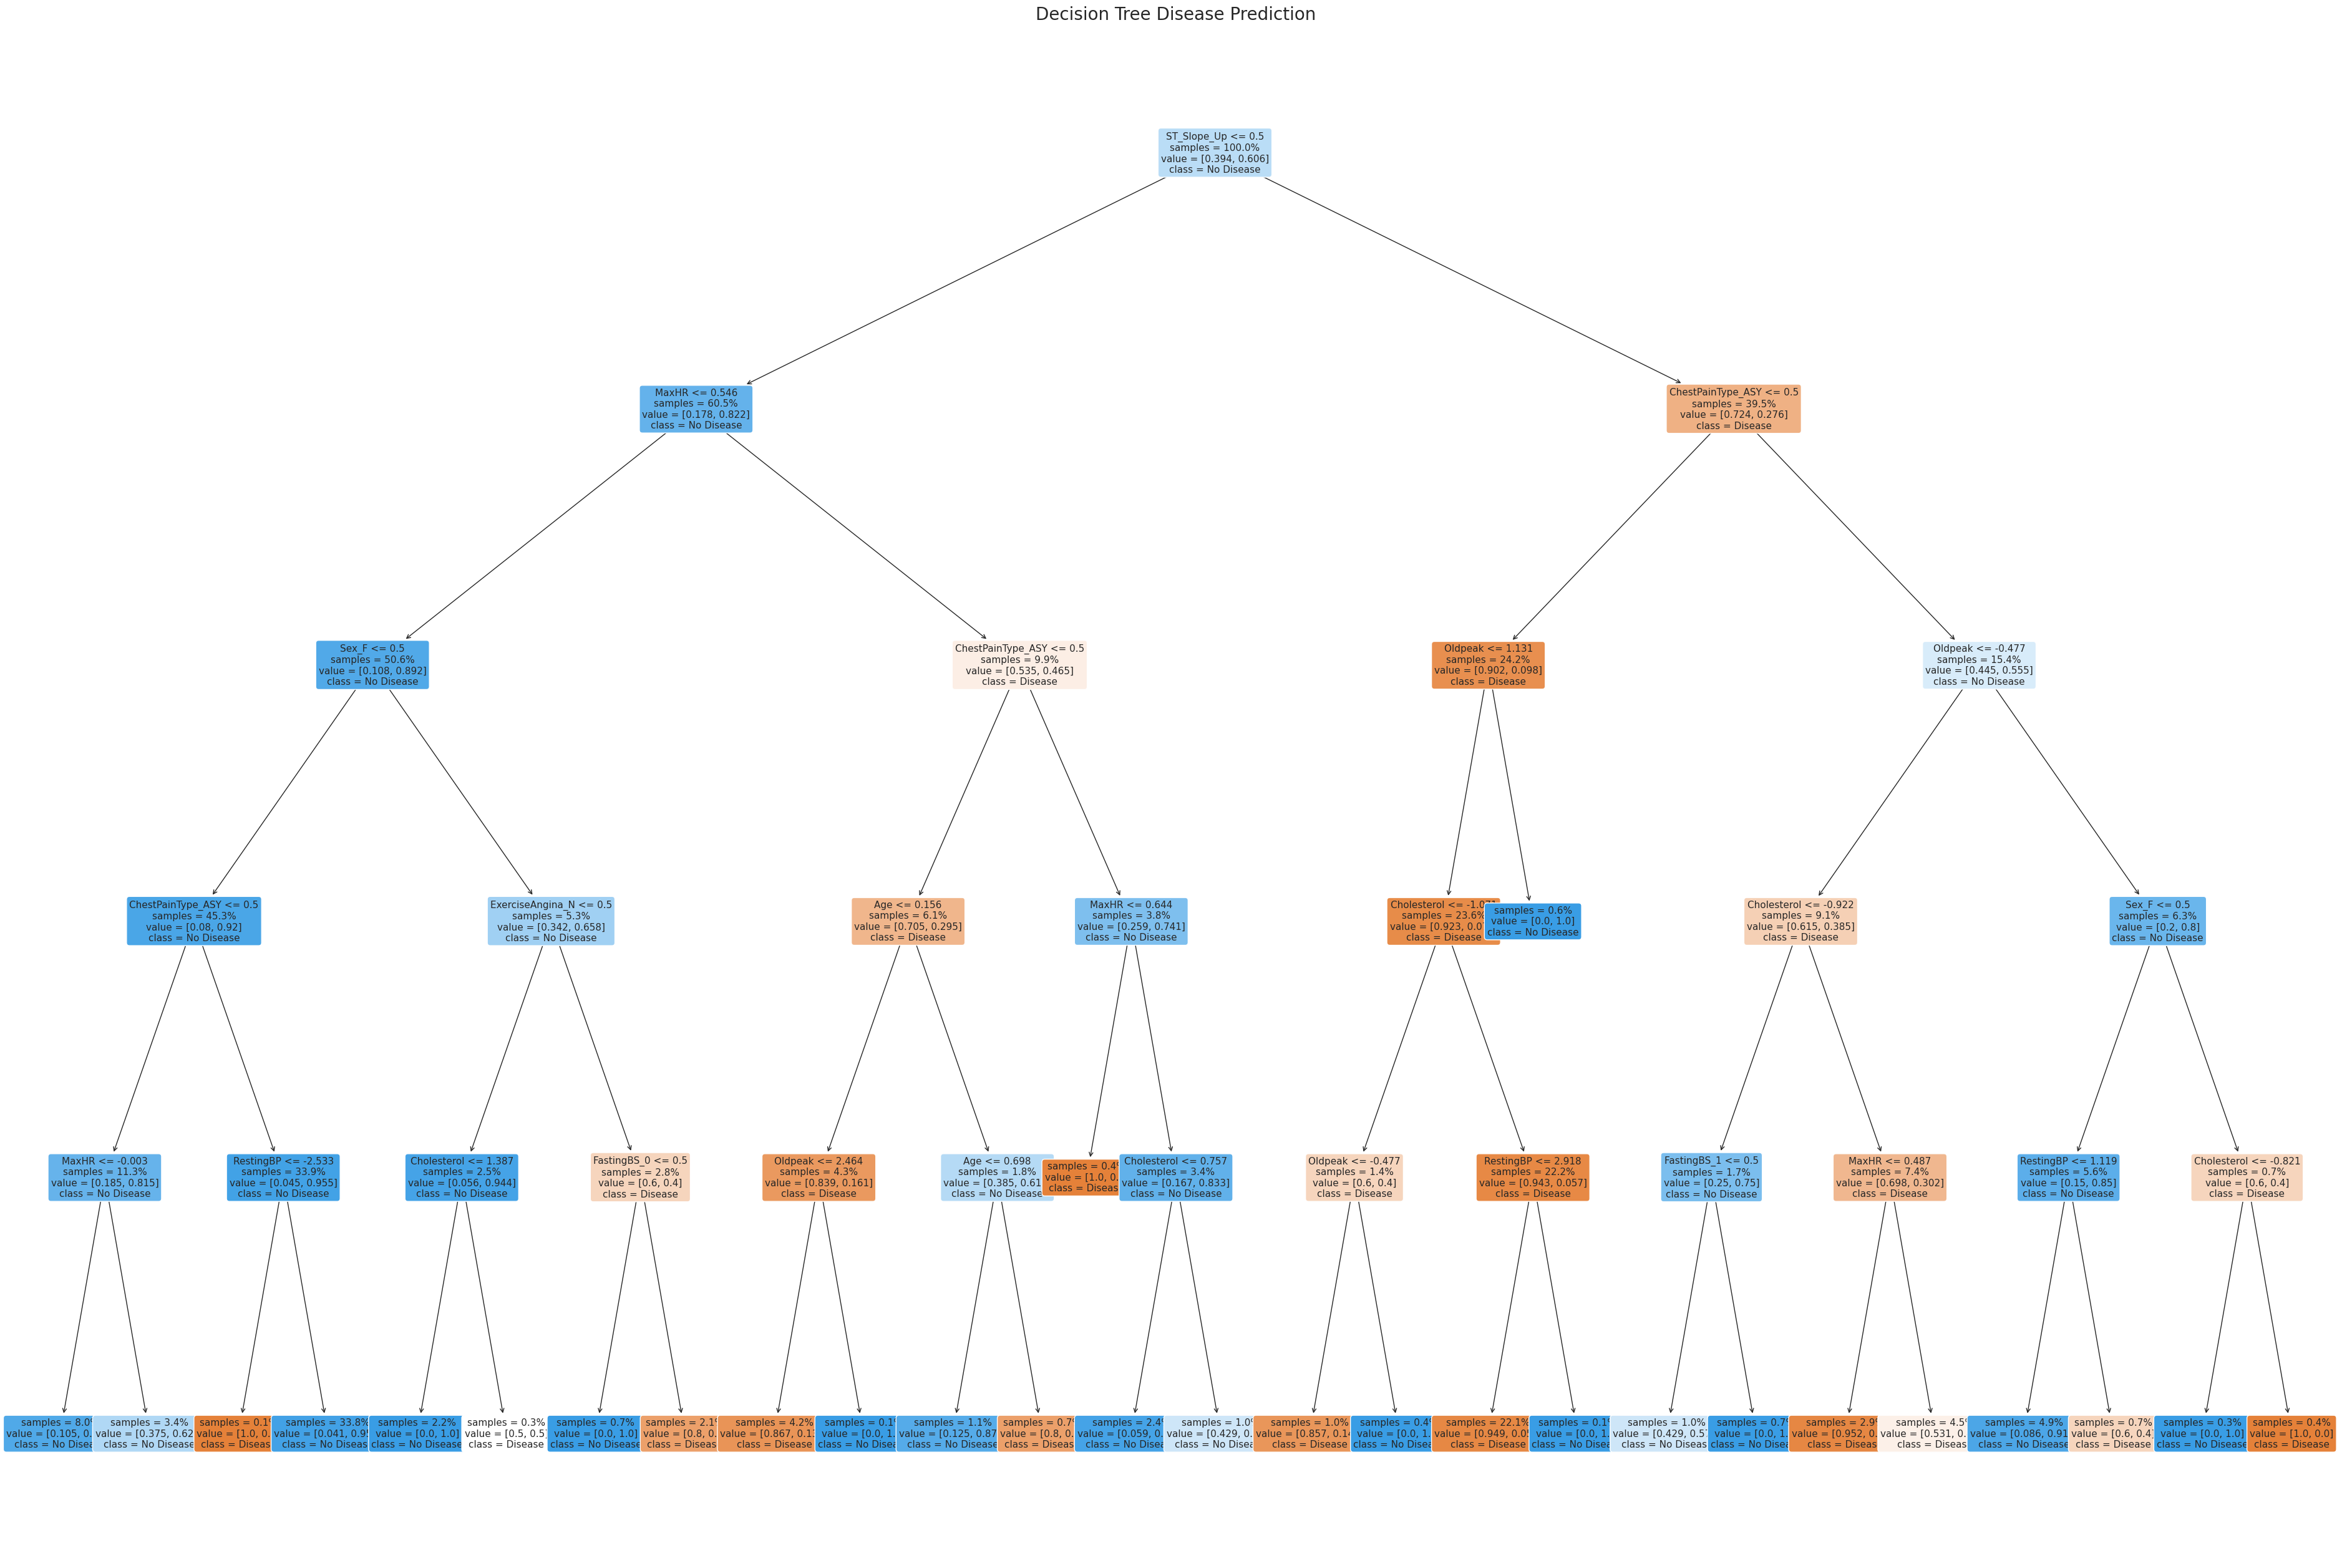

In [110]:
import os
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# a. Data Preprocessing
json_column = 'result_json' # "result_json" # 'json_row'
# i. Convert the "json_row" column into separate feature columns in the DataFrame
df1 = df1[(df1[json_column]!="")&(df1["result_json_description"]!= "JSONDecodeError")&(df1["HeartDisease"].notnull())]
df1[json_column] = df1.apply(lambda row: row[json_column] if row["validation_result"] == False else row["json_row"], axis=1)
df_json = pd.json_normalize(df1[json_column])
if "HeartDisease" in df_json.columns:
    df_json.drop("HeartDisease", axis=1, inplace=True)
df = pd.concat([df1[["HeartDisease"]].reset_index(drop=True), df_json.reset_index(drop=True)], axis=1)
df.dropna(subset=["HeartDisease"], inplace=True)

# ii. Perform any necessary feature scaling or normalization
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)])

# iii. Split the dataset into training and testing sets
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train = df.drop('HeartDisease', axis=1)
y_train = df['HeartDisease']


def plot_decision_tree(decision_tree_pipe, all_feature_names, dataset_name, title, class_names=['Disease', 'No Disease'], figsize=(48, 32)):
    sns.set_theme(style="whitegrid")
    matplotlib.rcParams.update({'font.size': 12})

    fig, ax = plt.subplots(figsize=figsize)
    plot_tree(decision_tree_pipe.named_steps['classifier'],
              feature_names=all_feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              fontsize=11,
              impurity=False,
              proportion=True,
              ax=ax)

    ax.set_title(title, fontsize=20)
    plt.xlabel("Decision Nodes", fontsize=18)
    plt.ylabel("Tree Depth", fontsize=18)

    sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

    plt.show()
    fig.savefig(f"results/feature_importance/{dataset_name}_decision_tree_plot.png", dpi=300, bbox_inches='tight')
    
def plot_shap_values(xgb_pipe, X_preprocessed, all_feature_names, dataset_name, title):
    # Calculate SHAP values
    explainer = shap.TreeExplainer(xgb_pipe)
    shap_values = explainer(X_preprocessed)

    # Plot SHAP values
    shap.summary_plot(shap_values, features=X_preprocessed, feature_names=all_feature_names, title=title, show=False)

    # Save the SHAP summary plot to a file
    plt.savefig(f"results/feature_importance/{dataset_name}_xgb_shap_plot.png", dpi=300, bbox_inches='tight')
    plt.close()

import shap

def xgboost_shap_plots(xgb_model, preprocessor, X, all_feature_names, dataset_name):
    # Initialize SHAP
    shap.initjs()

    # Using a random sample of the dataframe for better time computation
    X_sampled = X
    X_preprocessed = preprocessor.transform(X_sampled)

    # Explain the model's predictions using SHAP values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_preprocessed)

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_preprocessed, feature_names=all_feature_names, show=False)
    plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_summary_plot.png", dpi=300, bbox_inches='tight')
    plt.close()

    # SHAP Bar Plot
    shap.summary_plot(shap_values, X_preprocessed, feature_names=all_feature_names, plot_type="bar", show=False)
    plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_bar_plot.png", dpi=300, bbox_inches='tight')
    plt.close()

    # Individual Force Plots
    for i in range(X_sampled.shape[0]):
        shap.force_plot(explainer.expected_value, shap_values[i, :], X_sampled.iloc[i, :], show=False, matplotlib=True)
        plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_force_plot_Example_{i}.png", dpi=300, bbox_inches='tight')
        plt.close()
        break

def train_and_evaluate_models(dataset_name, df, num_features, cat_features, y_column):
    # Create the directory if it doesn't exist
    os.makedirs("results/feature_importance", exist_ok=True)


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', OneHotEncoder(), cat_features)])

    # iii. Split the dataset into training and testing sets
    X = df.drop(y_column, axis=1)
    y = df[y_column]

    X_train, _, y_train, _ = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    X_train = df.drop('HeartDisease', axis=1)
    y_train = df['HeartDisease']
    # b. Model Training
    # i. Define the models
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

    # ii. Create a pipeline for each model
    log_reg_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', log_reg)])
    decision_tree_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', decision_tree)])
    xgb_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', xgb_classifier)])

    # iii. Train the models
    log_reg_pipe.fit(X_train, y_train)
    decision_tree_pipe.fit(X_train, y_train)
    xgb_pipe.fit(X_train, y_train)

    # c. Calculate Feature Importance
    # i. Extract feature importances from each model
    log_reg_importances = log_reg_pipe.named_steps['classifier'].coef_[0]

    # ii. Get the feature names after preprocessing
    cat_feature_names = log_reg_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
    all_feature_names = np.concatenate([num_features, cat_feature_names])

    # iii. Create a DataFrame for each algorithm
    log_reg_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': log_reg_importances})
    decision_tree_importances = decision_tree_pipe.named_steps['classifier'].feature_importances_
    decision_tree_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': decision_tree_importances})
    xgb_importances = xgb_pipe.named_steps['classifier'].feature_importances_
    xgb_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': xgb_importances})

    # Save the feature importance DataFrames to CSV files
    log_reg_df.to_csv(f"results/feature_importance/{dataset_name}_log_reg_feature_importance.csv", index=False)
    decision_tree_df.to_csv(f"results/feature_importance/{dataset_name}_decision_tree_feature_importance.csv", index=False)
    xgb_df.to_csv(f"results/feature_importance/{dataset_name}_xgb_feature_importance.csv", index=False)

    # Save the Decision Tree plot to a file
    plot_decision_tree(decision_tree_pipe, all_feature_names, dataset_name, "Decision Tree Disease Prediction", ['Disease', 'No Disease'])
    
# Example usage:
# print(DATASET_NAME.split(".")[0])
train_and_evaluate_models(DATASET_NAME.split(".")[0], df, num_features, cat_features, "HeartDisease")


`use_label_encoder` is deprecated in 1.7.0.


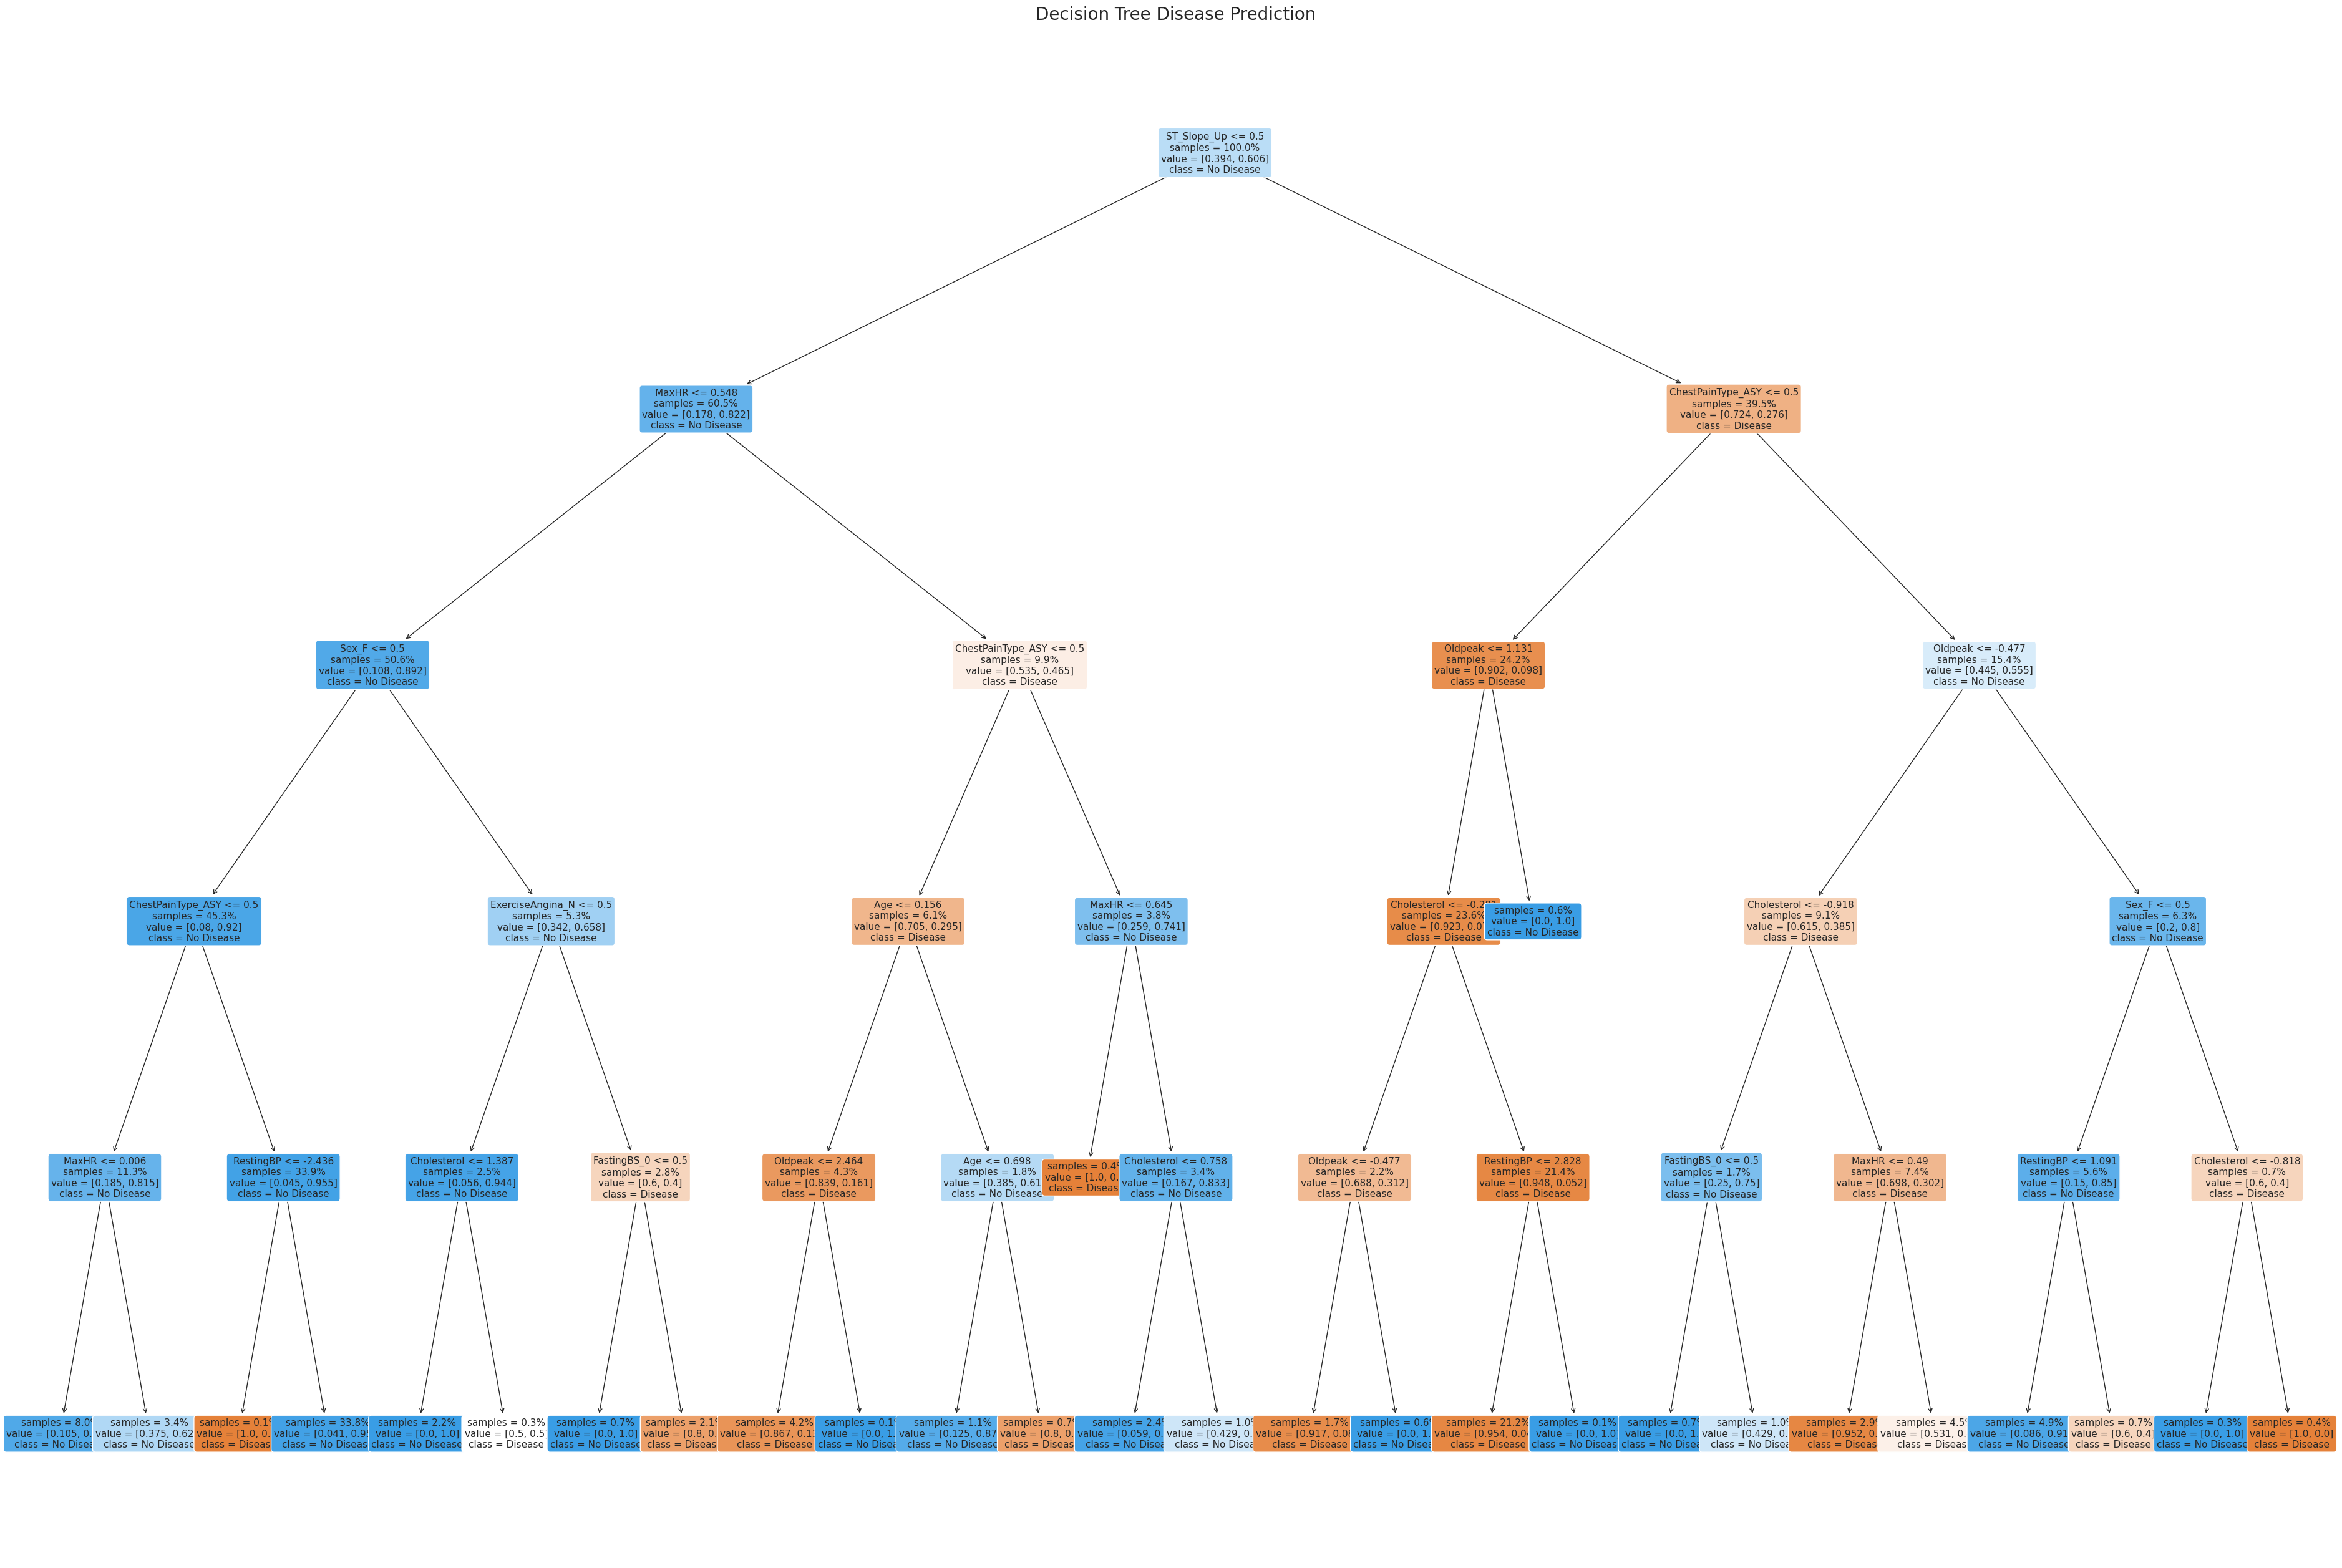

In [111]:
# a. Data Preprocessing
json_column = 'json_row' # "result_json" # 'json_row'
# i. Convert the "json_row" column into separate feature columns in the DataFrame
df1 = df1[(df1[json_column]!="")&(df1["result_json_description"]!= "JSONDecodeError")&(df1["HeartDisease"].notnull())]
df1[json_column] = df1.apply(lambda row: row[json_column] if row["validation_result"] == False else row["json_row"], axis=1)
df_json = pd.json_normalize(df1[json_column])
if "HeartDisease" in df_json.columns:
    df_json.drop("HeartDisease", axis=1, inplace=True)
df = pd.concat([df1[["HeartDisease"]].reset_index(drop=True), df_json.reset_index(drop=True)], axis=1)
df.dropna(subset=["HeartDisease"], inplace=True)

# ii. Perform any necessary feature scaling or normalization
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)])

# iii. Split the dataset into training and testing sets
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train = df.drop('HeartDisease', axis=1)
y_train = df['HeartDisease']


def plot_decision_tree(decision_tree_pipe, all_feature_names, dataset_name, title, class_names=['Disease', 'No Disease'], figsize=(48, 32)):
    sns.set_theme(style="whitegrid")
    matplotlib.rcParams.update({'font.size': 12})

    fig, ax = plt.subplots(figsize=figsize)
    plot_tree(decision_tree_pipe.named_steps['classifier'],
              feature_names=all_feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              fontsize=11,
              impurity=False,
              proportion=True,
              ax=ax)

    ax.set_title(title, fontsize=20)
    plt.xlabel("Decision Nodes", fontsize=18)
    plt.ylabel("Tree Depth", fontsize=18)

    sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

    plt.show()
    fig.savefig(f"results/feature_importance/{dataset_name}_decision_tree_plot_Ground_Truth_DATA.png", dpi=300, bbox_inches='tight')
    
def plot_shap_values(xgb_pipe, X_preprocessed, all_feature_names, dataset_name, title):
    # Calculate SHAP values
    explainer = shap.TreeExplainer(xgb_pipe)
    shap_values = explainer(X_preprocessed)

    # Plot SHAP values
    shap.summary_plot(shap_values, features=X_preprocessed, feature_names=all_feature_names, title=title, show=False)

    # Save the SHAP summary plot to a file
    plt.savefig(f"results/feature_importance/{dataset_name}_xgb_shap_plot_Ground_Truth_DATA.png", dpi=300, bbox_inches='tight')
    plt.close()

import shap

def xgboost_shap_plots(xgb_model, preprocessor, X, all_feature_names, dataset_name):
    # Initialize SHAP
    shap.initjs()

    # Using a random sample of the dataframe for better time computation
    X_sampled = X
    X_preprocessed = preprocessor.transform(X_sampled)

    # Explain the model's predictions using SHAP values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_preprocessed)

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_preprocessed, feature_names=all_feature_names, show=False)
    plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_summary_plot_Ground_Truth_DATA.png", dpi=300, bbox_inches='tight')
    plt.close()

    # SHAP Bar Plot
    shap.summary_plot(shap_values, X_preprocessed, feature_names=all_feature_names, plot_type="bar", show=False)
    plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_bar_plot_Ground_Truth_DATA.png", dpi=300, bbox_inches='tight')
    plt.close()

    # Individual Force Plots
    for i in range(X_sampled.shape[0]):
        shap.force_plot(explainer.expected_value, shap_values[i, :], X_sampled.iloc[i, :], show=False, matplotlib=True)
        plt.savefig(f"results/feature_importance/{dataset_name}_XGBoost_shap_force_plot_Example_{i}_Ground_Truth_DATA.png", dpi=300, bbox_inches='tight')
        plt.close()
        break

def train_and_evaluate_models(dataset_name, df, num_features, cat_features, y_column):
    # Create the directory if it doesn't exist
    os.makedirs("results/feature_importance", exist_ok=True)


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', OneHotEncoder(), cat_features)])

    # iii. Split the dataset into training and testing sets
    X = df.drop(y_column, axis=1)
    y = df[y_column]

    X_train, _, y_train, _ = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    X_train = df.drop('HeartDisease', axis=1)
    y_train = df['HeartDisease']
    # b. Model Training
    # i. Define the models
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

    # ii. Create a pipeline for each model
    log_reg_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', log_reg)])
    decision_tree_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', decision_tree)])
    xgb_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', xgb_classifier)])

    # iii. Train the models
    log_reg_pipe.fit(X_train, y_train)
    decision_tree_pipe.fit(X_train, y_train)
    xgb_pipe.fit(X_train, y_train)

    # c. Calculate Feature Importance
    # i. Extract feature importances from each model
    log_reg_importances = log_reg_pipe.named_steps['classifier'].coef_[0]

    # ii. Get the feature names after preprocessing
    cat_feature_names = log_reg_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
    all_feature_names = np.concatenate([num_features, cat_feature_names])

    # iii. Create a DataFrame for each algorithm
    log_reg_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': log_reg_importances})
    decision_tree_importances = decision_tree_pipe.named_steps['classifier'].feature_importances_
    decision_tree_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': decision_tree_importances})
    xgb_importances = xgb_pipe.named_steps['classifier'].feature_importances_
    xgb_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': xgb_importances})

    # Save the feature importance DataFrames to CSV files
    log_reg_df.to_csv(f"results/feature_importance/{dataset_name}_log_reg_feature_importance_Ground_Truth_DATA.csv", index=False)
    decision_tree_df.to_csv(f"results/feature_importance/{dataset_name}_decision_tree_feature_importance_Ground_Truth_DATA.csv", index=False)
    xgb_df.to_csv(f"results/feature_importance/{dataset_name}_xgb_feature_importance_Ground_Truth_DATA.csv", index=False)

    # Save the Decision Tree plot to a file
    plot_decision_tree(decision_tree_pipe, all_feature_names, dataset_name, "Decision Tree Disease Prediction", ['Disease', 'No Disease'])
    
    # # Plot SHAP values for the XGBoost model
    # x_preprocessed = preprocessor.fit_transform(X_train)
    # # Plot SHAP values for the XGBoost model
    # xgb_model = xgb_pipe.named_steps['classifier']
    # plot_shap_values(xgb_model, x_preprocessed, all_feature_names, dataset_name, "XGBoost SHAP Values for Dataset")
    # # Call the function within train_and_evaluate_models
    # xgboost_shap_plots(xgb_pipe.named_steps['classifier'], preprocessor, X_train, all_feature_names, dataset_name)
    
# Example usage:
# print(DATASET_NAME.split(".")[0])
train_and_evaluate_models(DATASET_NAME.split(".")[0], df, num_features, cat_features, "HeartDisease")


/home/abisercic/Documents/Private/reaserch/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


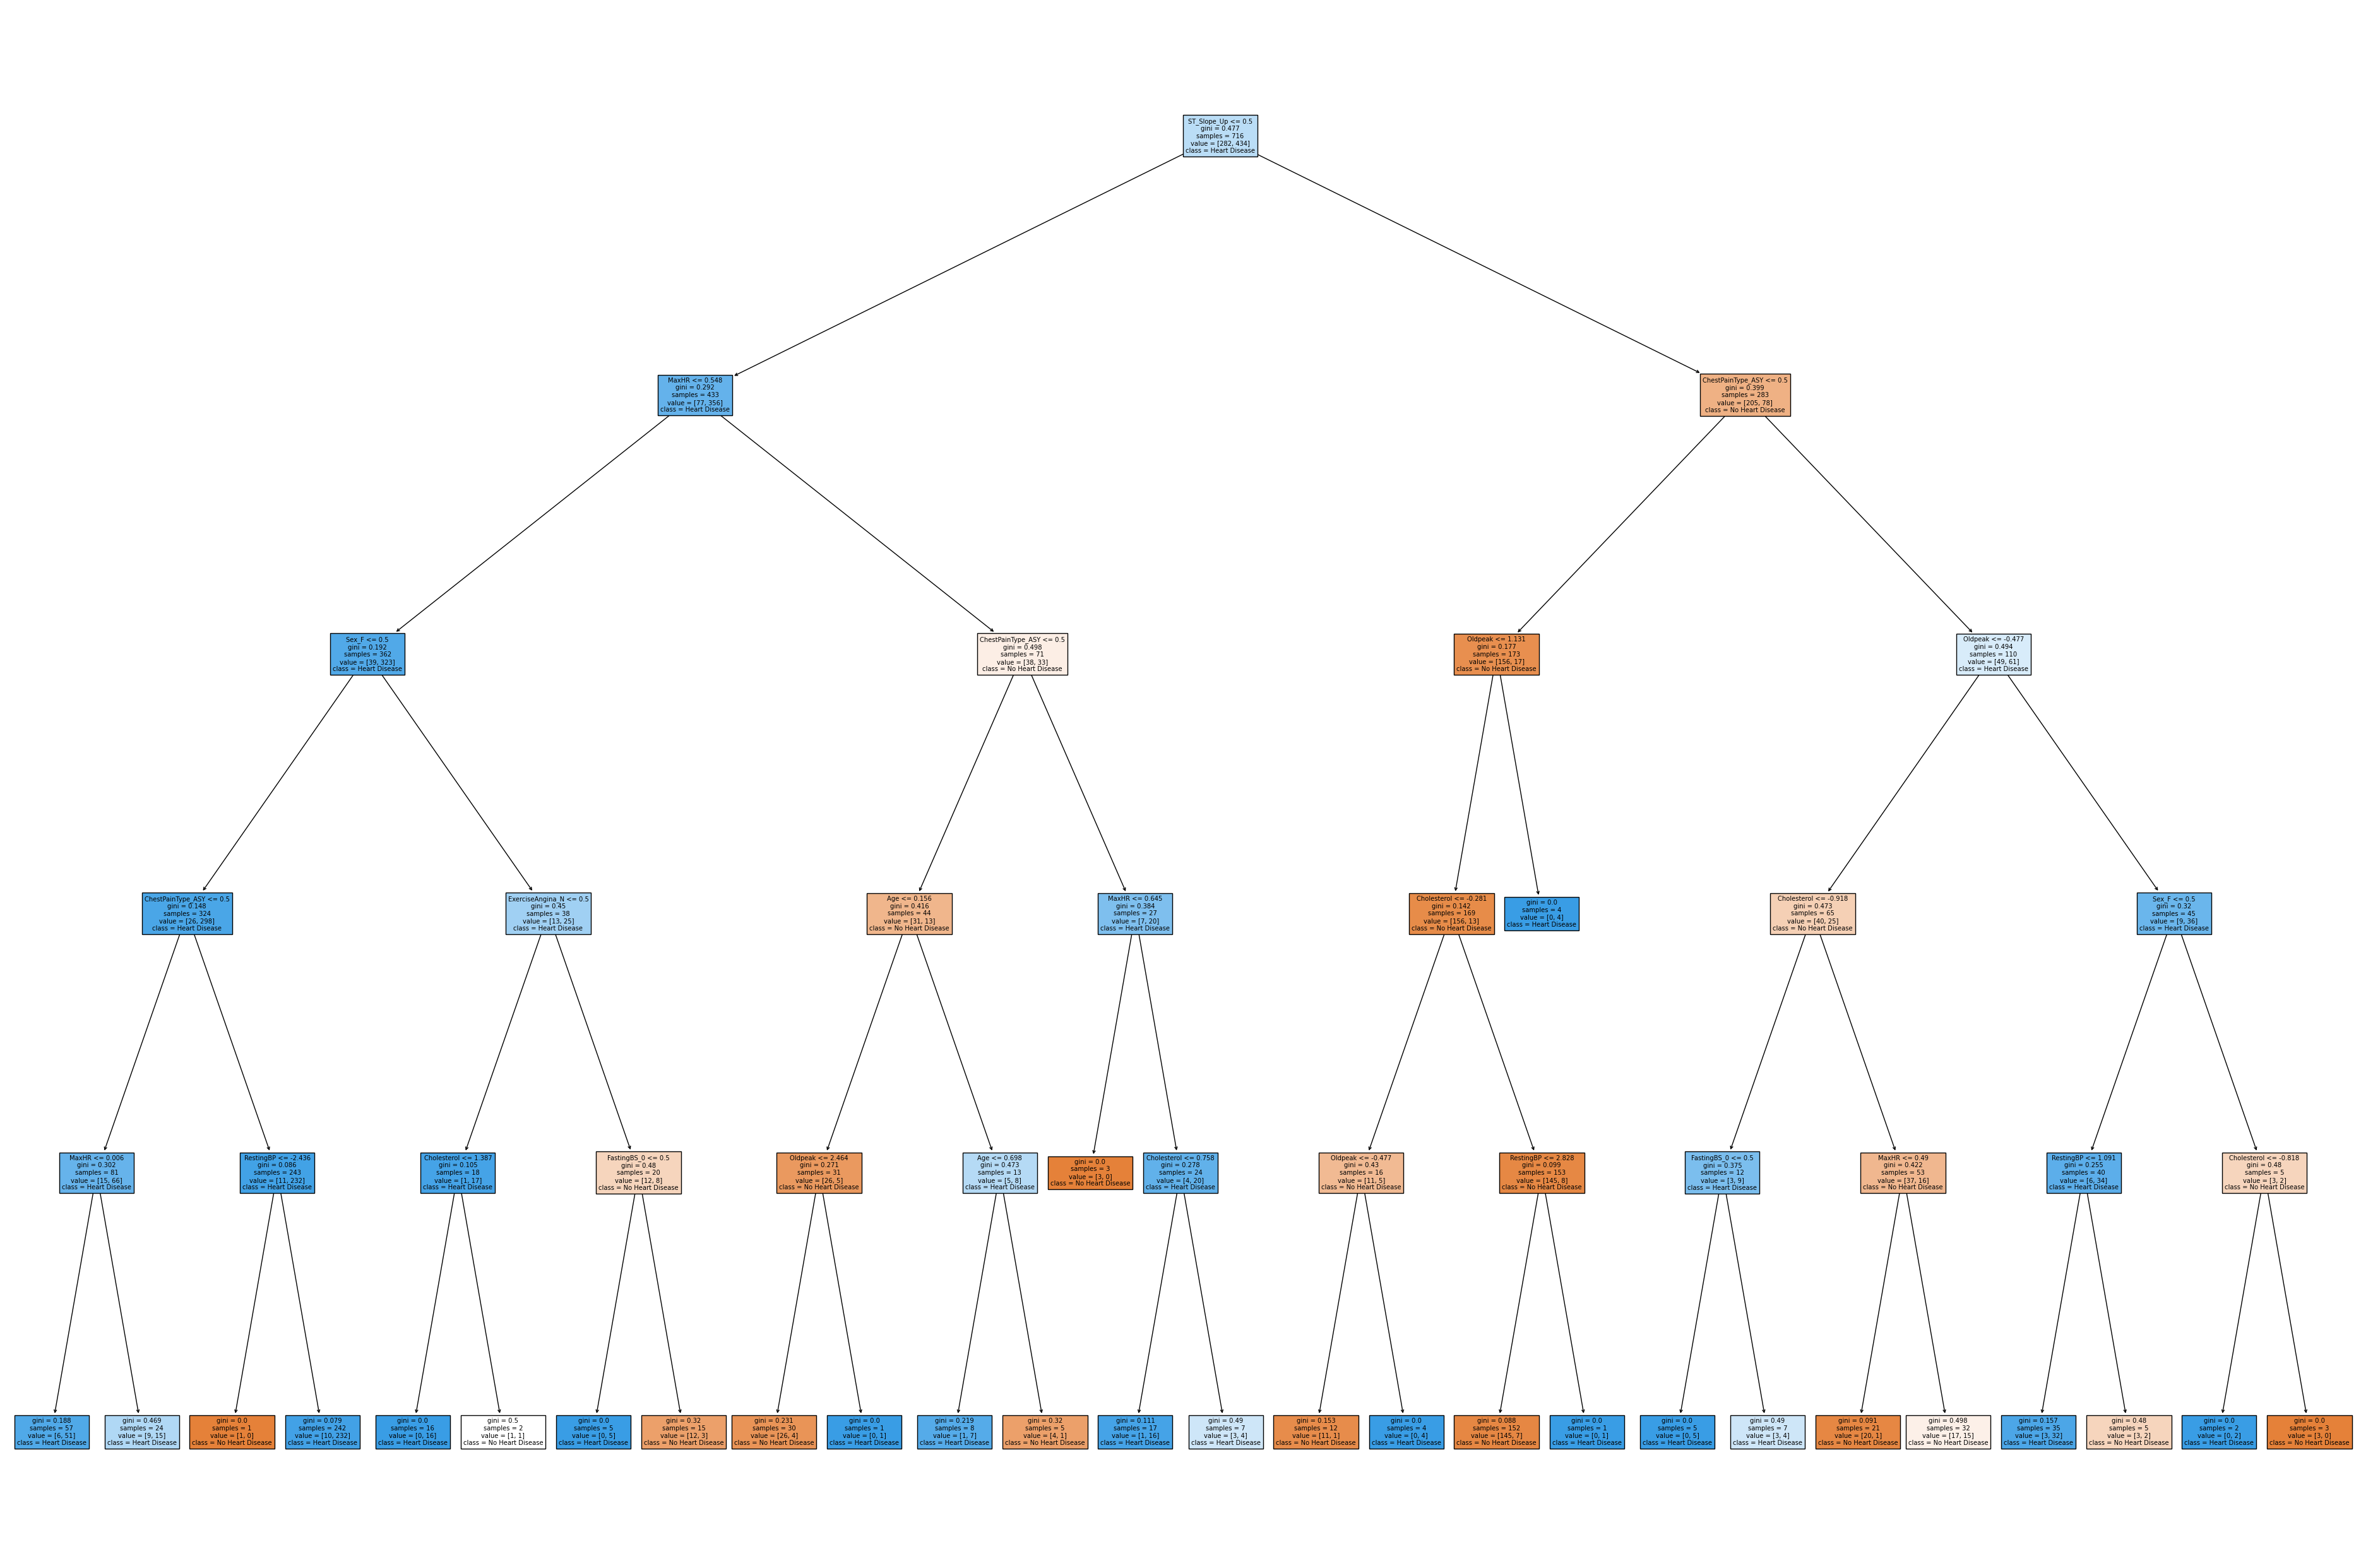

In [74]:
# b. Model Training
# i. Define the models
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# ii. Create a pipeline for each model
log_reg_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', log_reg)])
decision_tree_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', decision_tree)])
xgb_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', xgb_classifier)])

# iii. Train the models
log_reg_pipe.fit(X_train, y_train)
decision_tree_pipe.fit(X_train, y_train)
xgb_pipe.fit(X_train, y_train)

# c. Calculate Feature Importance
# i. Extract feature importances from each model
log_reg_importances = log_reg_pipe.named_steps['classifier'].coef_[0]

# ii. Get the feature names after preprocessing
cat_feature_names = log_reg_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# iii. Create a DataFrame for each algorithm
log_reg_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': log_reg_importances})
decision_tree_importances = decision_tree_pipe.named_steps['classifier'].feature_importances_
decision_tree_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': decision_tree_importances})
xgb_importances = xgb_pipe.named_steps['classifier'].feature_importances_
xgb_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': xgb_importances})

# d. Plot the trained Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 32))
plot_tree(decision_tree_pipe.named_steps['classifier'], feature_names=all_feature_names, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.show()


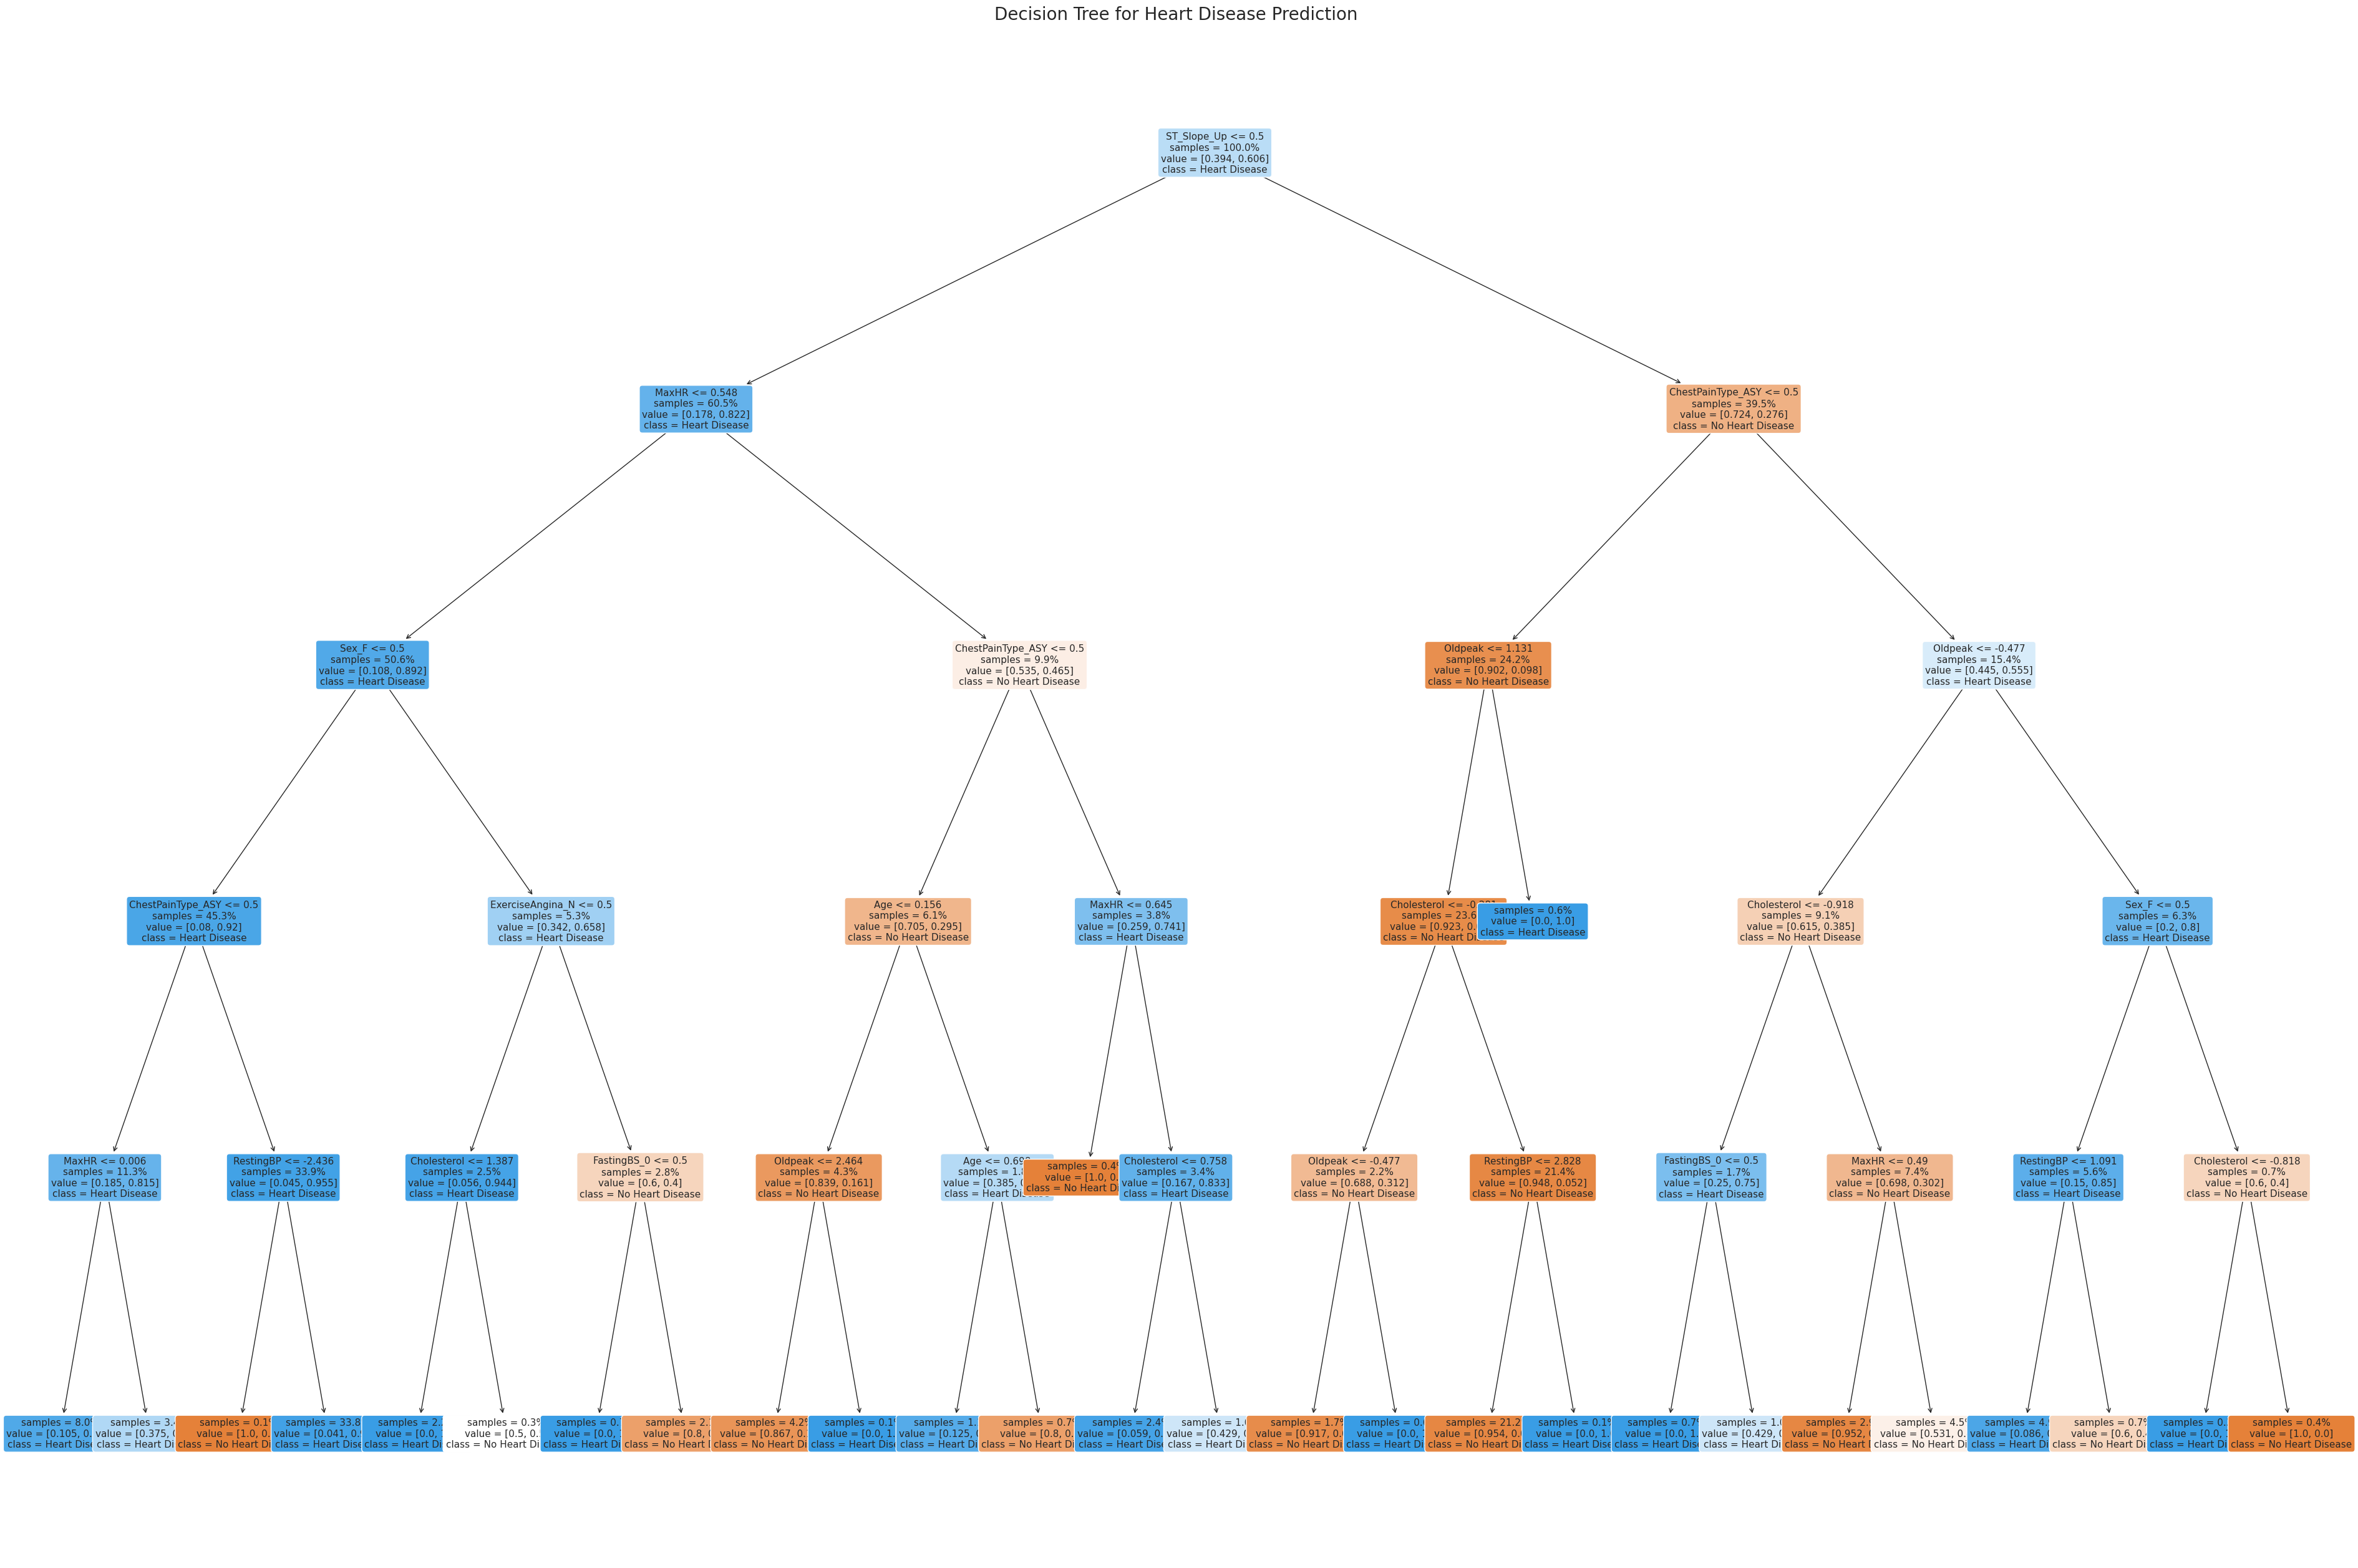

In [76]:
import seaborn as sns
import matplotlib

# Set the seaborn theme and adjust the font size
sns.set_theme(style="whitegrid")
matplotlib.rcParams.update({'font.size': 12})

# Plot the trained Decision Tree
fig, ax = plt.subplots(figsize=(48, 32))
plot_tree(decision_tree_pipe.named_steps['classifier'],
          feature_names=all_feature_names,
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True,
          rounded=True,
          fontsize=11,
          impurity=False,
          proportion=True,
          ax=ax)

# Set the title and labels
ax.set_title("Decision Tree for Heart Disease Prediction", fontsize=20)
plt.xlabel("Decision Nodes", fontsize=18)
plt.ylabel("Tree Depth", fontsize=18)

# Remove the box around the plot
sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

# Show the plot
plt.show()


In [71]:
decision_tree_df

,Feature,Importance
0,Age,0.079839
1,RestingBP,0.066224
2,Cholesterol,0.074454
3,MaxHR,0.155915
4,Oldpeak,0.079199
5,Sex_F,0.018909
6,Sex_M,0.008647
7,ChestPainType_ASY,0.108268
8,ChestPainType_ATA,0.000000
9,ChestPainType_NAP,0.008706


In [69]:
log_reg_df

,Feature,Importance
0,Age,0.128826
1,RestingBP,0.065665
2,Cholesterol,-0.503612
3,MaxHR,-0.249168
4,Oldpeak,0.460357
5,Sex_F,-0.656493
6,Sex_M,0.656481
7,ChestPainType_ASY,1.215473
8,ChestPainType_ATA,-0.378704
9,ChestPainType_NAP,-0.523249


# NLP model

In [21]:
# COLAB